In [3]:
import numpy as np 
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
color = sns.color_palette()
import sklearn.metrics as metrics

import warnings
warnings.filterwarnings("ignore")

In [4]:
Default = pd.read_csv(r'C:\Users\khushi Rajput\Downloads\Default.csv')

Default.head()

,default,student,balance,income
0,No,No,729.53,44361.63
1,No,Yes,817.18,12106.13
2,No,No,1073.55,31767.14
3,No,No,529.25,35704.49
4,No,No,785.66,38463.50


In [5]:
Default.shape

(10000, 4)

In [6]:
Default.describe()

,balance,income
count,10000.000000,10000.000000
mean,835.374877,33516.981852
std,483.714957,13336.639582
min,0.000000,771.970000
25%,481.732500,21340.460000
50%,823.635000,34552.645000
75%,1166.305000,43807.730000
max,2654.320000,73554.230000


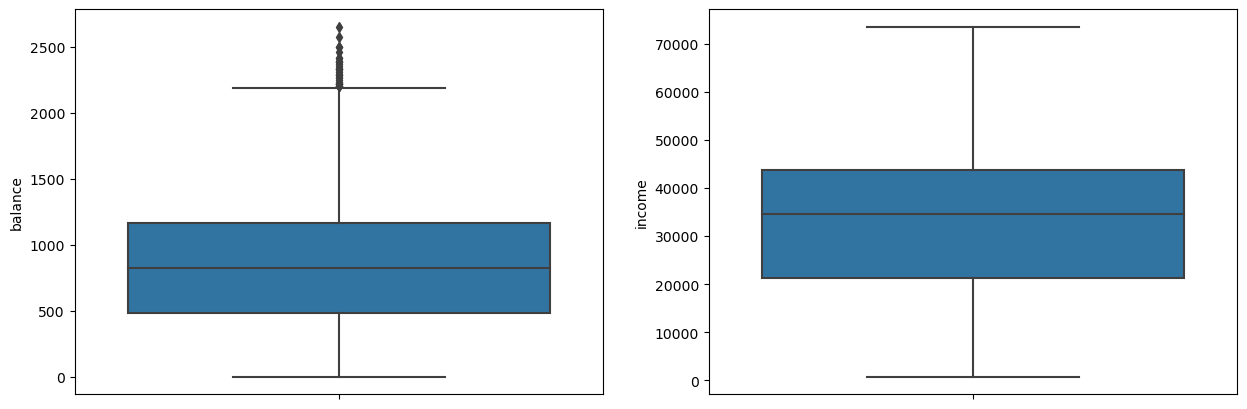

In [7]:
plt.figure(figsize = (15, 5))
plt.subplot(1,2,1)
sns.boxplot(y= Default['balance'])

plt.subplot(1,2,2)
sns.boxplot(y = Default['income'])
plt.show()

ValueError: could not convert string to float: 'No'

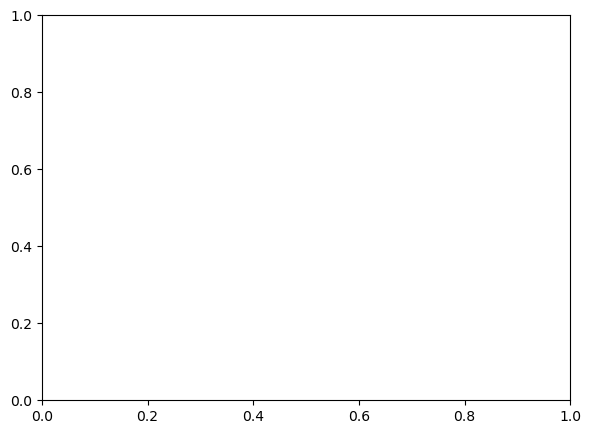

In [8]:
plt.figure(figsize = (15,5))
plt.subplot(1,2,1)
sns.countplot(Default['student']) 

plt.subplot(1,2,2)
sns.countplot(Default['default'])
plt.show()

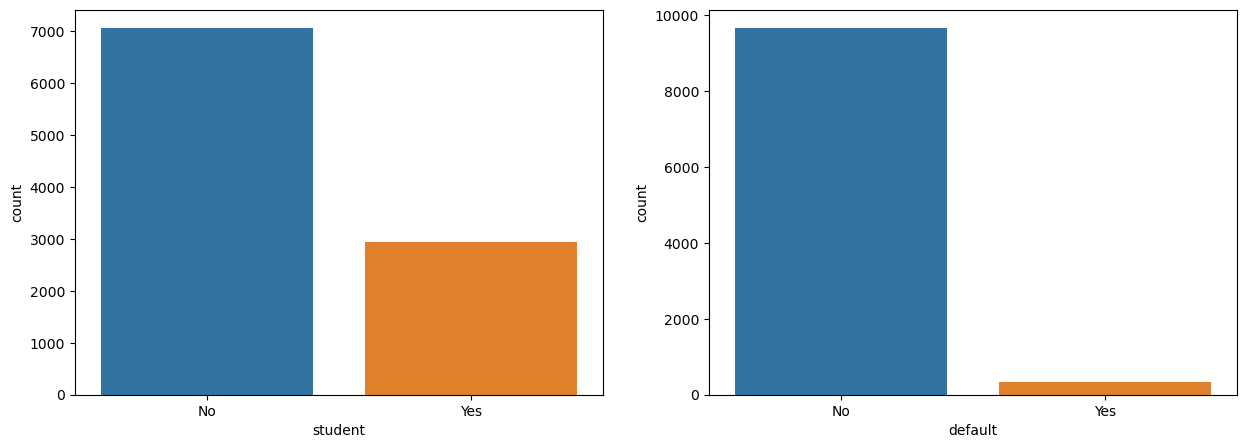

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming Default is your DataFrame

plt.figure(figsize=(15, 5))

# Plot for 'student' column
plt.subplot(1, 2, 1)
sns.countplot(x='student', data=Default)

# Plot for 'default' column
plt.subplot(1, 2, 2)
sns.countplot(x='default', data=Default)

plt.show()


In [10]:
Default['student'].value_counts()

student
No     7056
Yes    2944
Name: count, dtype: int64

In [11]:
Default['default'].value_counts()

default
No     9667
Yes     333
Name: count, dtype: int64

In [12]:
Default['student'].value_counts(normalize=True)

student
No     0.7056
Yes    0.2944
Name: proportion, dtype: float64

In [13]:
Default['default'].value_counts(normalize=True)

default
No     0.9667
Yes    0.0333
Name: proportion, dtype: float64

TypeError: boxplot() takes from 0 to 1 positional arguments but 2 were given

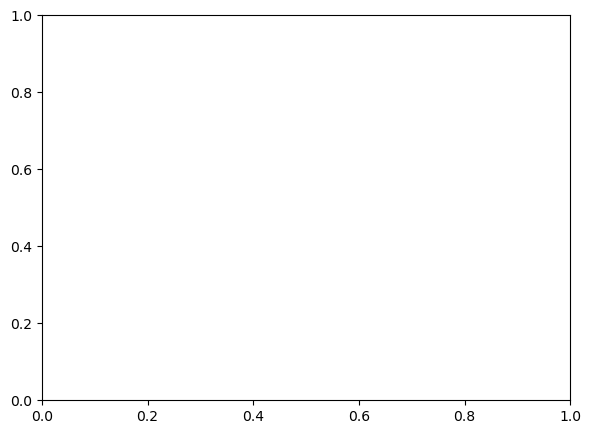

In [15]:
plt.figure(figsize = (15,5))
plt.subplot(1,2,1)
sns.boxplot(Default['default'], Default['balance'])

plt.subplot(1,2,2)
sns.boxplot(Default['default'],Default['income'])
plt.show()

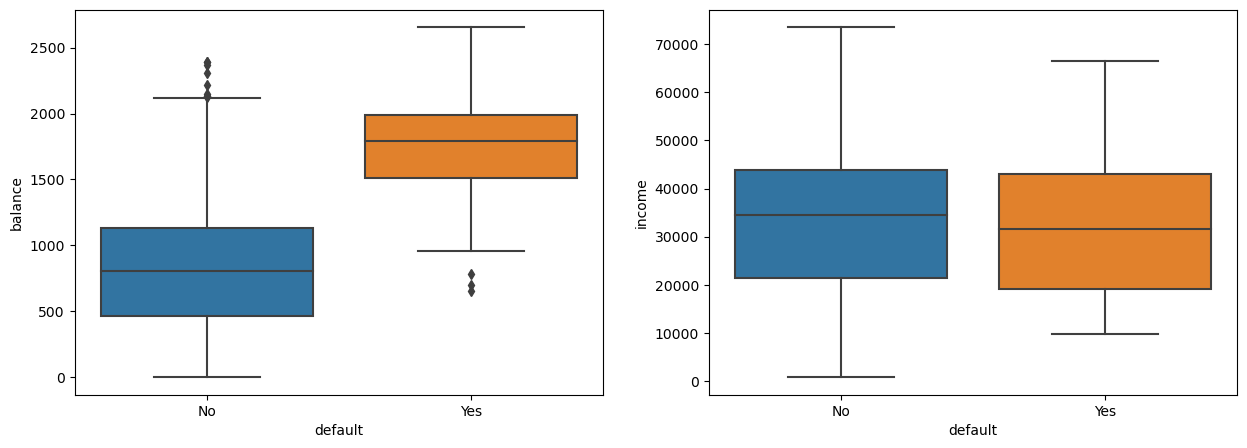

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns

# Ensure Default is your DataFrame

plt.figure(figsize=(15, 5))

# First subplot
plt.subplot(1, 2, 1)
sns.boxplot(x='default', y='balance', data=Default)

# Second subplot
plt.subplot(1, 2, 2)
sns.boxplot(x='default', y='income', data=Default)

plt.show()


In [18]:
pd.crosstab(Default['student'],Default['default'], normalize='index').round(2)

default,No,Yes
student,,
No,0.97,0.03
Yes,0.96,0.04


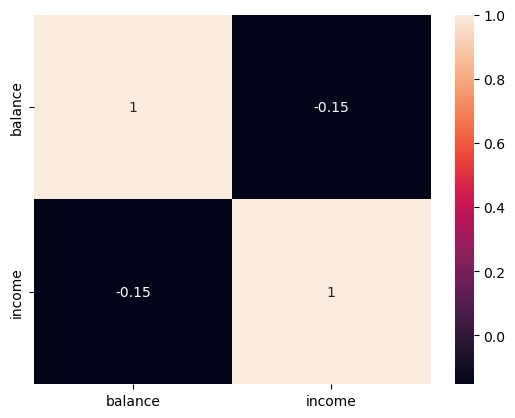

In [19]:
sns.heatmap(Default[['balance','income']].corr(), annot= True)
plt.show()

In [24]:
Default.isnull().sum()

default    0
student    0
balance    0
income     0
dtype: int64

In [26]:
Q1, Q3 = Default['balance'].quantile([.25,.75])
IQR = Q3 -Q1
LL = Q1 - 1.5*(IQR)
UL = Q3 + 1.5*(IQR)

In [27]:
UL

2193.16375

In [28]:
df = Default[Default['balance']> UL]

In [29]:
df

,default,student,balance,income
173,Yes,Yes,2205.80,14271.49
1136,Yes,No,2499.02,51504.29
1160,Yes,Yes,2502.68,14947.52
1359,Yes,No,2220.97,40725.10
1502,Yes,Yes,2332.88,11770.23
1609,Yes,Yes,2269.95,18021.11
2096,Yes,Yes,2261.85,20030.17
2140,No,Yes,2308.89,19110.27
2929,Yes,Yes,2387.31,28296.91
3162,Yes,Yes,2415.32,17429.50


In [30]:
df['default'].count()

31

In [31]:
df['default'].value_counts(normalize = True)

default
Yes    0.83871
No     0.16129
Name: proportion, dtype: float64

In [32]:
df['default'].value_counts()

default
Yes    26
No      5
Name: count, dtype: int64

In [33]:
Default['balance'] = np.where(Default['balance']>UL,UL, Default['balance'])

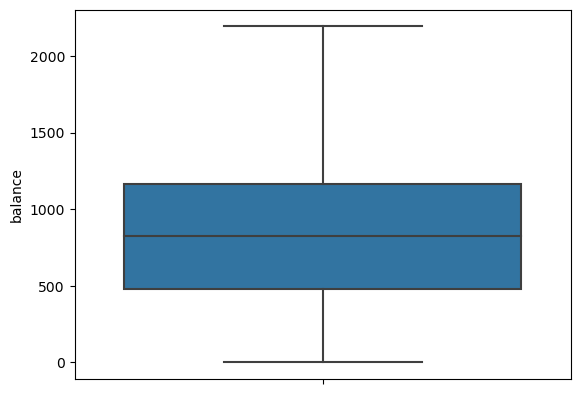

In [34]:
sns.boxplot(y = Default['balance'])
plt.show()

In [35]:
Default = pd.get_dummies(Default, drop_first = True)

In [39]:
Default.head()

,balance,income,default,student
0,729.53,44361.63,False,False
1,817.18,12106.13,False,True
2,1073.55,31767.14,False,False
3,529.25,35704.49,False,False
4,785.66,38463.50,False,False


In [40]:
Default.columns = ['balance','income', 'default', 'student']

In [41]:
Default.head()

,balance,income,default,student
0,729.53,44361.63,False,False
1,817.18,12106.13,False,True
2,1073.55,31767.14,False,False
3,529.25,35704.49,False,False
4,785.66,38463.50,False,False


In [42]:
from sklearn.model_selection import train_test_split